# Confronto Insertion Sort vs Quicksort

1. [Obiettivo](#obiettivo)
2. [Premesse teoriche](#premesse-teoriche)
3. [Codice](#codice)
4. [Conclusione](#conclusione)

### Obiettivo
Vogliamo confrontare i tempi di esecuzione medi di ordinamento in verso crescente - per diverse dimensioni di dataset randomici - usando algoritmi di ordinamento quicksort e insertion sort.

### Modalità operative
Per valutare le tempistiche dobbiamo raccogliere i singoli tempi di esecuzione, per fare ciò ci serviremo di mathplotlib, una libreria che ci permette di mappare i dati su un grafico, e di pandas, una libreria che ci permette di scrivere dataframe sotto forma di tabella o file csv.

### Premesse Teoriche

- **Quicksort:**
    - Si basa sulla strategia *divide et impera*:
        1. Scelta del pivot (partition())
        2. Partizionamento dell’array in:
            - elementi < pivot
            - pivot
            - elementi > pivot
        3. Ricorsione sulle due sottosequenze
    - Ordina sul posto, quindi non ha bisogno di strutture di appoggio
    - Non è stabile, elementi con lo stesso valore potrebbero essere scambiati (iterazione inutile)
    - Complessità:
        - Nel caso medio $\Theta(n\log n)$
        - Nel caso peggiore $\Theta(n^2)$ (tutti elementi più grandi o più piccoli del pivot)
        - Nel caso migliore $\Theta(n)$
    - Non è **stabile**, le versioni stabili non ordinano sul posto
- **Insertion sort:**
    - Si prende ogni elemento come chiave e quelli a sinistra maggiori vengono spostati a destra della chiave mentre quelli minori rimangono nel posto
    - Simile all'ordinamento di un mazzo di carte per inserimento
    - Ordina sul posto
    - Stabile
    - Complessità:
        - Nel caso medio $\Theta(n^2)$
        - Nel caso peggiore $\Theta(n^2)$ (tutti elementi disordinati in ordine inverso)
        - Nel caso migliore $\Theta(n)$ (tutti elementi ordinati)

Questa sezione confronta sperimentalmente gli algoritmi di ordinamento Insertion Sort e Quicksort sui casi migliore e peggiore (con liste costruite ad-hoc) e su dataset randomici per poi calcolarne la media dei tempi al crescere del numero di elementi del dataset. 
Verranno mostrati tempi di esecuzione e grafici che aiutano a confrontare le complessità teoriche con i risultati pratici.

### Codice

In [3]:
import time, random, math
# INSERTION #
def insertion_sort(a):
    # in-place
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j+1] = a[j]
            j -= 1
        a[j+1] = key
    return a
#############

# QUICKSORT #
def partition(arr, l, r):
        pivot = arr[r] # il pivot è sempre l'ultimo elemento dell' array/sottoarray
        i = l - 1
        for j in range(l, r):
            if arr[j] <= pivot:
                i += 1  # l'indice i serve per spostare gli elementi a sinistra del pivot, che poi verrà messo nel mezzo
                arr[i], arr[j] = arr[j], arr[i] # swap elementi nella scrittura di python, arr[i] <=> arr[j]
        arr[i+1], arr[r] = arr[r], arr[i+1] # inserisco il pivot nel mezzo
        return i+1
def quicksort(a, p=0, r=None):
    if r is None: # nel caso volessi ordinare una porzione, altrimenti ordina tutto l'array essendo r l'ultimo elemento
        r = len(a)-1
    if p < r:
        q = partition(a, p, r)
        quicksort(a, p, q-1)
        quicksort(a, q+1, r)
    return a
#############

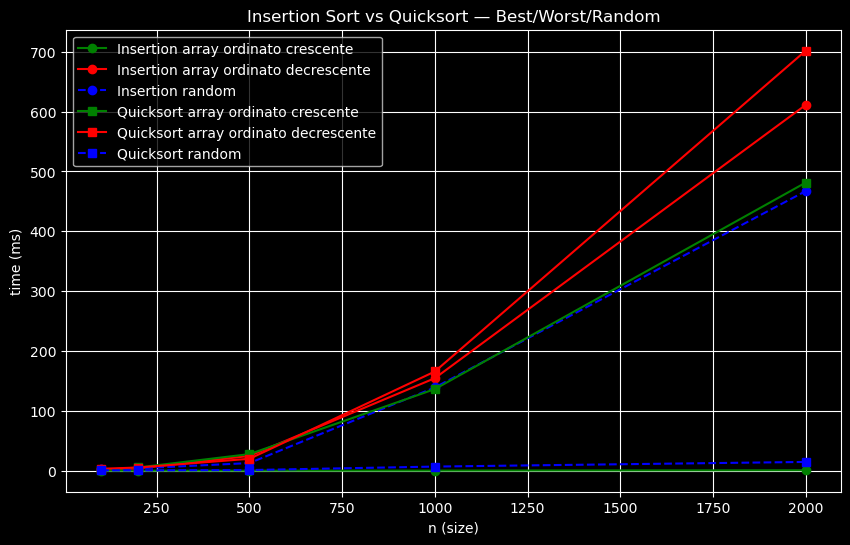

,insertion migliore ms,insertion peggiore ms,insertion randomico (media) ms,quicksort migliore ms,quicksort peggiore ms,quicksort randomico (media) ms
n,,,,,,
100,0.0362,2.2032,2.120500,1.1233,3.2823,0.646150
200,0.0867,3.8636,4.004225,5.4782,5.3885,0.654675
500,0.0972,24.7351,12.833975,27.7896,19.9865,1.144325
1000,0.2049,154.6528,139.117000,136.4196,165.8168,6.965650
2000,0.7771,611.1406,467.194800,481.4265,701.7598,14.724625


In [4]:
# Benchmark: casi migliore/peggiore e random
import gc
import numpy as np
import matplotlib.pyplot as plt

# helper timing function
from time import perf_counter as now

def check(arr: list) -> bool:
    result = True
    if len(arr) > 0:
        x:int = arr[0]
        for i in range(len(arr)-1): # range non include l'ultimo elemento
            if arr[i] > arr[i + 1]:
                print("[ERROR]: array non ordinato correttamente!")
                result = False
                break
    #print("[CORRECT]: array ordinato correttamente!")
    return result

def time_func(fn, arr):
    a = arr.copy()
    gc.disable()
    t0 = now()
    fn(a)
    t1 = now()
    gc.enable()
    # controllo se l'array a è stato ordinato
    check(a)
    return (t1 - t0) * 1000  # ms

sizes = [100, 200, 500, 1000, 2000] # dimensioni dei 5 dataset, aggiungere a piacimento

results = {
    "insertion": [],
    "quicksort": []
}

for n in sizes:
    # Caso migliore insertion -> array già ordinato
    arr_ord_asc = list(range(n))
    t_ins_ord_asc = time_func(insertion_sort, arr_ord_asc)
    t_qs_ord_asc = time_func(quicksort, arr_ord_asc)

    # Caso peggiore insertion -> array inversamente ordinato
    arr_ord_desc = list(range(n, 0, -1)) # step = -1 così va al contrario
    t_ins_ord_desc = time_func(insertion_sort, arr_ord_desc)
    t_qs_ord_desc = time_func(quicksort, arr_ord_desc)

    # Caso random media su k ripetizioni
    k = 5
    t_ins_rand = 0.0
    t_qs_rand = 0.0
    for k in range(k):
        r = random.sample(range(0, n*3), n)
        t_ins_rand += time_func(insertion_sort, r)
        t_qs_rand += time_func(quicksort, r)
    t_ins_rand /= k
    t_qs_rand /= k

    results['insertion'].append((t_ins_ord_asc, t_ins_ord_desc, t_ins_rand))
    results['quicksort'].append((t_qs_ord_asc, t_qs_ord_desc, t_qs_rand))

# grafici
sizes_arr = np.array(sizes)
ins_ord_asc = np.array([x[0] for x in results['insertion']])
ins_ord_desc = np.array([x[1] for x in results['insertion']])
ins_rand = np.array([x[2] for x in results['insertion']])
qs_ord_asc = np.array([x[0] for x in results['quicksort']])
qs_ord_desc = np.array([x[1] for x in results['quicksort']])
qs_rand = np.array([x[2] for x in results['quicksort']])

plt.style.use("dark_background")

plt.figure(figsize=(10,6))
plt.plot(sizes_arr, ins_ord_asc, 'g-o', label='Insertion array ordinato crescente')
plt.plot(sizes_arr, ins_ord_desc, 'r-o', label='Insertion array ordinato decrescente')
plt.plot(sizes_arr, ins_rand, 'b--o', label='Insertion random')

plt.plot(sizes_arr, qs_ord_asc, 'g-s', label='Quicksort array ordinato crescente')
plt.plot(sizes_arr, qs_ord_desc, 'r-s', label='Quicksort array ordinato decrescente')
plt.plot(sizes_arr, qs_rand, 'b--s', label='Quicksort random')

plt.xlabel('n (size)')
plt.ylabel('time (ms)')
plt.title('Insertion Sort vs Quicksort — Best/Worst/Random')
plt.legend()
plt.grid(True)
plt.show()

# stampa della tabella dei tempi per ogni dataset
import pandas as pd
rows = []
for i, n in enumerate(sizes):
    rows.append({
        'n': n,
        'insertion migliore ms': ins_ord_asc[i],
        'insertion peggiore ms': ins_ord_desc[i],
        'insertion randomico (media) ms': ins_rand[i],
        'quicksort migliore ms': qs_ord_asc[i],
        'quicksort peggiore ms': qs_ord_desc[i],
        'quicksort randomico (media) ms': qs_rand[i],
    })

pd.DataFrame(rows).set_index('n')


## Conclusione

- Complessità teoriche:
  - Insertion Sort: best $ O(n) $ (già ordinato), worst $ O(n^2) $ (inverso), medio $ O(n^2) $.
  - Quicksort (pivot come ultimo elemento): best $ O(n \log n) $ (partizionamenti bilanciati), worst $ O(n^2) $ ovvero array già ordinato, average $ O(n \log n) $.

- Cosa aspettarsi nei grafici:
  - Insertion Sort mostrerà tempi molto bassi nel caso best $ O(n) $ (array già ordinato) e una crescita quadratica nel worst/random per $ n $ grandi.
  - Quicksort mostrerà comportamento vicino a $ O(n \log n) $ per random e, con la scelta pivot come ultimo elemento, può degradare a $ O(n^2) $ esattamente come insertionsort su array già ordinati sia in ordine crescente che decrescente -> in questo modo i sottoarray per la ricorsione sono sbilanciato poiché prendendo come pivot l'ultimo elemento avremo un sottoarrai sinistro pieno e destro vuoto se l'array è già ordinato in modo crescente, mentre l'opposto se in modo decrescente (meglio usare pivot casuale così da ottenere un valore atteso del costo $ O(n \log n) $).

- Suggerimenti sperimentali:
  - Per misure più accurate aumentare le dimensioni dei dataset e ripetere più volte; usare la mediana sui ripetuti per ogni n.